## 线性规划 *( Linear Programming, LP )*

<p align="center">
    $$
    \text{一般线性规划标准型:}
    $$
    $$
    \displaystyle max \text{ }Z = \underset{j=1}{\overset{n}{\Sigma}} c_{j}x_{j}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(1)}\\ 
    $$
</p>
<br>
<p align="center">
  $$
    \text{s.t.}
    \begin{cases}
    \overset{n}{\underset{j=1}{\Sigma}} a_{ij}x_j = b_i\quad\text{,i = 1,2,…,m}\\
    \text{ }\\
    \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(2)}\\
    \text{ }\\
    x_j \geq 0 \quad\text{,i = 1,2,…,n}\\
  \end{cases}
  $$
</p>

### 线性规划问题解的概念 ###
 1. 可行解
    - 满足(2)的解$x_i\quad\quad\text{i=1,2,…,n}$
    - 使(1)达到最大值的可行解——***最优解***
 2. 可行域
    - 所有可行解构成的集合，记为R
 3. 图解法
    
    $\quad$ 例1 某机床厂 生产甲、乙两种机床,每台销售后的利润分别为4000元与3000元。生产甲机床需用A、B机器加工，加工时间分别为每台2小时和1小时;生产乙机床需用A、B、C三种机器加工，加工时间为每台各一小时。 若每天可用于加工的机器时数分别为A机器10小时、B机器8小时和C机器7小时，问该厂应生产甲、乙机床各几台，才能使总利润最大?
上述问题的数学模型:设该厂生产x台甲机床和x2乙机床时总利润最大，则x应满足：<br>
$$
    max\text{ } Z = 4000x_1 + 3000x_2\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(1)}\\
$$
$$
    \text{约束条件}
    \begin{cases}
        2x_1 + x_2 \leq 10\\
        \\
        x_1 + x_2 \leq 8\\
        \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(2)}\\
        x_2 \leq 7\\
        \\
        x_1, x_2 \geq 0
    \end{cases}
$$
    <img src="./image/9}N(0[A{35]ZMRM@4$F3197.png" alt="示例图片" width="600"/>

### 推广到多维空间： ###
1. 可行域R可能为空集或非空集；非空时，R必为若干个半平面的交集（除非是<font color="green">空间维数退化</font>）；R可能是有界区域也可能是无界区域。
2. R非空时，线性规划可能有有限最优解，也可能无有限最优解（目标函数值无界）。
3. 若线性规划存在有限最优解，则必可找到具有最优目标函数值的可行域R的顶点。

$\text{一般n维空间中，满足线性等式:}$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad$
$\overset{n}{\underset{i=1}{\Sigma}}\text{ }a_ix_i = b$<br>
的点集被称为一个**超平面**;<br><br>
$
\overset{n}{\underset{i=1}{\Sigma}}\text{ }a_ix_i \leq
$
**<font size=1>$\text{ (or}\geq\text{)}$</font>**
b<br>的点集被称为一个半空间，其中$(a_1,a_2,…,a_n)$为一个n维行向量，b为一个实数。<br><br>
若干个半空间的交集被称为**多胞形**，有界的多胞形被称为**多面体**   ————线性规划的可行域必为多胞形<br><br>
空集$\emptyset$也被视为多胞体。<br><br> 


### 求解线性规划问题示例 ###
- 用scipy.optimize.linprog 函数实现
- eg:
$$
\text{max }\text{ }3x_1 + 4x_2
$$
$$
\begin{cases}
2x_1 + 4x_2 \leq 8\\
\\
x_1 + 2x_2 \leq 6\\
\\
x_1 \geq 0\\ 
\\
x_2 \geq 0\\
\end{cases}
$$

In [23]:
from scipy.optimize import linprog

# 目标函数系数（注意 linprog 默认是最小化问题，所以目标函数系数要取负数）
c = [-3, -4]  # 最大化 3x1 + 4x2 转换为最小化 -3x1 - 4x2

# 约束矩阵（每一行表示一个约束）
A = [
    [2, 1],  # 2x1 + x2
    [1, 2]   # x1 + 2x2
]

# 约束的右边界
b = [8, 6]

# 变量的范围（非负约束）
x_bounds = (0, None)  # x1 和 x2 都是非负的

# 求解线性规划问题
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, x_bounds], method='highs')
"""
A_ub:不等式约束矩阵
b_ub:不等式约束右边界值
x_bounds:决策变量取值范围
method:算法
"""
# 结果输出
if result.success:
    x1_opt, x2_opt = result.x
    max_value = -result.fun  # 目标函数值
    print(f'最优解：x1 = {x1_opt:.2f}, x2 = {x2_opt:.2f}')
    print(f'最大目标函数值：{max_value:.2f}')
else:
    print('线性规划问题没有解')

最优解：x1 = 3.33, x2 = 1.33
最大目标函数值：15.33


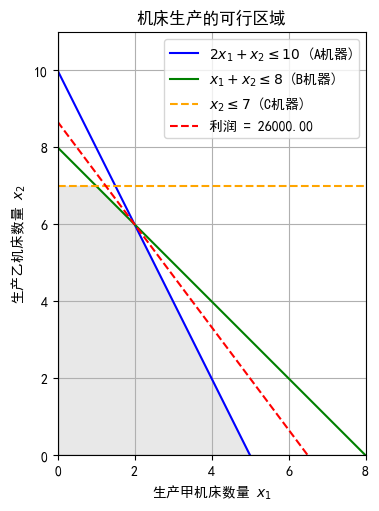

最大利润为: 26000.00 元
生产甲机床数量: 2.00 台
生产乙机床数量: 6.00 台


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import linprog

# 设置支持中文的字体
rcParams['font.sans-serif'] = ['SimHei']  # 或者使用 'Microsoft YaHei'
rcParams['axes.unicode_minus'] = False    # 解决负号问题

# 设置机器的加工限制
A_time = 10  # A机器可用时间
B_time = 8   # B机器可用时间
C_time = 7   # C机器可用时间

# 生产甲机床的时间
time_x1 = 2  # 每台甲机床需要2小时
# 生产乙机床的时间
time_x2_A = 1  # 每台乙机床需要1小时（A）
time_x2_B = 1  # 每台乙机床需要1小时（B）
time_x2_C = 1  # 每台乙机床需要1小时（C）

# 线性规划求解
c = [-4000, -3000]  # 目标函数的系数（负号表示最大化问题转化为最小化问题）
A = [
    [2, 1],   # A机器的约束
    [1, 1],   # B机器的约束
    [0, 1]    # C机器的约束
]
b = [A_time, B_time, C_time]  # 约束的右边界

# 变量的上下界
x_bounds = (0, None)  # x1和x2的非负限制

# 求解线性规划
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, x_bounds], method='highs')

# 结果
x1_opt, x2_opt = res.x
max_profit = -res.fun

# 创建x1（甲机床）和x2（乙机床）的范围
x1_range = np.linspace(0, 8, 100)
# 利润平行线（通过最优点）
z = max_profit
x2_line = (z - 4000 * x1_range) / 3000

# 根据约束条件计算x2的限值
x2_A_limit = (A_time - time_x1 * x1_range)    # A机器的限制
x2_B_limit = (B_time - x1_range)               # B机器的限制
x2_C_limit = C_time                           # C机器的限制

# 创建图形
plt.figure(figsize=(4, 5.5))

# 绘制可行区域的限制
plt.plot(x1_range, x2_A_limit, label=r'$2x_1 + x_2 \leq 10$ (A机器)', color='blue')
plt.plot(x1_range, x2_B_limit, label=r'$x_1 + x_2 \leq 8$ (B机器)', color='green')
plt.axhline(y=C_time, color='orange', label=r'$x_2 \leq 7$ (C机器)', linestyle='--')

# 设置x2的范围和绘制填充的可行区域
x2_range = np.maximum(0, np.minimum(x2_A_limit, np.minimum(x2_B_limit, C_time)))
plt.fill_between(x1_range, 0, x2_range, where=(x2_range > 0), interpolate=True, color='lightgrey', alpha=0.5)

# 绘制最大利润点的利润平行线
plt.plot(x1_range, x2_line, linestyle='--', label=f'利润 = {max_profit:.2f}', color='red')

# 添加坐标轴和标题
plt.xlim(0, 8)
plt.ylim(0, 11)
plt.xlabel(r'生产甲机床数量 $x_1$')
plt.ylabel(r'生产乙机床数量 $x_2$')
plt.title('机床生产的可行区域')
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)

# 设置坐标轴比例一致
plt.gca().set_aspect('equal', adjustable='box')

# 添加图例
plt.legend()

# 显示图形
plt.grid()
plt.show()

# 输出结果
print(f'最大利润为: {max_profit:.2f} 元')
print(f'生产甲机床数量: {x1_opt:.2f} 台')
print(f'生产乙机床数量: {x2_opt:.2f} 台')